In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display_html 
! pip install pgeocode
import pgeocode

In [0]:
project_names=['_projectid', '_teacher_acctid', '_schoolid', 'school_ncesid', 
                                  'school_latitude', 'school_longitude', 'school_city', 'school_state', 
                                  'school_zip', 'school_metro', 'school_district', 'school_county', 
                                  'school_charter', 'school_magnet', 'school_year_round', 'school_nlns', 
                                  'school_kipp', 'school_charter_ready_promise', 'teacher_prefix', 
                                  'teacher_teach_for_america', 'teacher_ny_teaching_fellow', 
                                  'primary_focus_subject', 'primary_focus_area' ,'secondary_focus_subject',
                                  'secondary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 
                                  'vendor_shipping_charges', 'sales_tax', 'payment_processing_charges',
                                  'fulfillment_labor_materials', 'total_price_excluding_optional_support', 
                                  'total_price_including_optional_support', 'students_reached',
                                  'total_donations', 'num_donors', 'eligible_double_your_impact_match',
                                  'eligible_almost_home_match', 'funding_status', 'date_posted', 
                                  'date_completed', 'date_thank_you_packet_mailed', 'date_expiration']

projects = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projects.csv", delimiter = ',')
donations = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Donations.csv', delimiter = ',')
donors = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Donors.csv', delimiter = ',')
resources = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Resources.csv', delimiter = ',')
schools = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Schools.csv', delimiter = ',')
teachers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Teachers.csv', delimiter = ',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [0]:
## Merge donations and donors 
donation_donor = donations.merge(donors, on='Donor ID', how='inner')

## Merge projects and schools 
projects_schools= projects.merge(schools, on='School ID', how='inner')

In [0]:
#Add school ID to donation and donors df to be able to merge projects 
donation_donor_schoolID = donation_donor.merge(projects[['Project ID','School ID']],on='Project ID', how='inner')
## Merge donations,donors, and schools 
donation_donor_school = donation_donor_schoolID.merge(schools, on='School ID', how='inner')

In [0]:
#miles data.... don't use
!pip install geopy
from geopy.distance import geodesic
from geopy.geocoders import get_geocoder_for_service
get_geocoder_for_service("nominatim")
geolocator = Nominatim(user_agent="nominatim",format_string="%s, Cleveland OH")
import geopy.geocoders
from geopy.geocoders import Nominatim
from geopy import distance
geopy.geocoders.options.default_timeout = None
format_string="%s, Cleveland OH"
distances=[]
for i in range(0,100):
  if pd.isnull(donation_donor_school.iloc[i,7]) == False:
    if pd.isnull(donation_donor_school.iloc[i,17]) == False:
      location_a = geolocator.geocode(donation_donor_school.iloc[i,7])
      lat_long_a= (location_a.latitude,location_a.longitude)
      location_b = geolocator.geocode(donation_donor_school.iloc[i,17])
      lat_long_b= (location_b.latitude,location_b.longitude)
      dist=distance.distance(lat_long_a, lat_long_b).miles
      distances.append(dist)
    else:
      distances.append('NaN')

In [0]:
n=len(donation_donor_school.iloc[:,0])
donor_id=[]
school_id=[]
states=[]
#make data frame of donors, schools, states
for i in range(n):
  donor_id.append(donation_donor_school.iloc[i,1])
  school_id.append(donation_donor_school.iloc[i,11])
  if pd.isnull(donation_donor_school.iloc[i,8]) == False:
    if pd.isnull(donation_donor_school.iloc[i,15]) == False:
      if donation_donor_school.iloc[i,8] == donation_donor_school.iloc[i,15]:
        states.append(donation_donor_school.iloc[i,8])
      else:
        states.append(donation_donor_school.iloc[i,8]+', '+donation_donor_school.iloc[i,15])
donor_school_states=pd.DataFrame({'Donor Id':donor_id, 'School Id':school_id,'State(s)':states})

In [0]:
school_id_same=[]
school_id_diff=[]
donor_id_same=[]
donor_id_diff=[]
same_states=[]
donor_state=[]
school_state=[]
#separate donations (donor/school pair) by whether or not they are in- or out- of state
for i in range(n):
  if ', ' in donor_school_states.iloc[i,2]:
    donor_id_diff.append(donor_school_states.iloc[i,0])
    school_id_diff.append(donor_school_states.iloc[i,1])
    donor_state.append(donor_school_states.iloc[i,2].split(", ",1)[0])
    school_state.append(donor_school_states.iloc[i,2].split(", ",1)[1])
  else:
    donor_id_same.append(donor_school_states.iloc[i,0])
    school_id_same.append(donor_school_states.iloc[i,1])
    same_states.append(donor_school_states.iloc[i,2])
#make dataframes for same-state donations and different-state donations
donor_school_same_state=pd.DataFrame({'Donor Id':donor_id_same, 'School Id':school_id_same,'State(s)':same_states})
donor_school_diff_state=pd.DataFrame({'Donor Id':donor_id_diff, 'School Id':school_id_diff,'Donor State':donor_state, 'School State':school_state})

Text(0.5, 1.0, 'Top 10 States with the Most Out-State Donors')

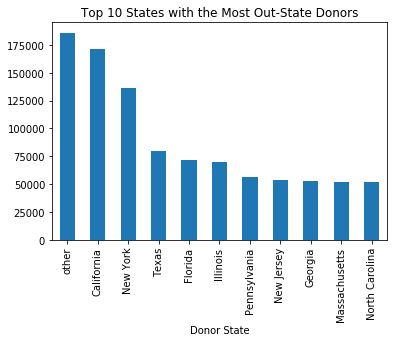

In [0]:
#top 10 states where the donor donates outside of state
diff_donor_states=donor_school_diff_state.groupby("Donor State").count().iloc[:,0]
common_diff_states_donor = diff_donor_states.sort_values(ascending=False).head(11)
common_diff_states_donor.plot.bar().set_title('Top 10 States with the Most Out-State Donors')

Text(0.5, 1.0, 'Top 10 States with the Most In-State Donors')

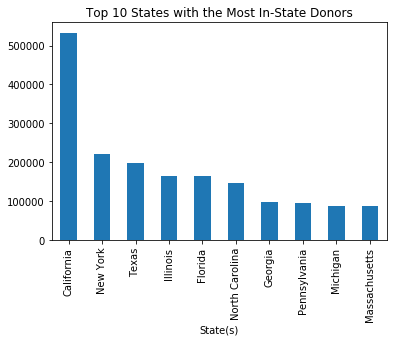

In [0]:
#top 10 states where the donors donates in-state
common_same_states=same_states_count.sort_values(ascending=False).head(10)
common_same_states.plot.bar().set_title('Top 10 States with the Most In-State Donors')

Text(0.5, 1.0, 'Top 10 States with Schools Receiving Most Out-State Donations')

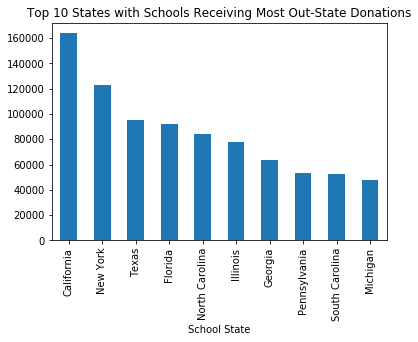

In [0]:
#top 10 states where the school receives a donation from outside of state
diff_school_states=donor_school_diff_state.groupby("School State").count().iloc[:,0]
common_diff_states_school=diff_school_states.sort_values(ascending=False).head(10)
common_diff_states_school.plot.bar().set_title('Top 10 States with Schools Receiving Most Out-State Donations')

It is probably better to look at the *percentages* of in- and out-of-state donations per state, rather than the *count*.

In [0]:
#top 10 states with the greatest percentage of out of state donors
same_states_count=donor_school_same_state.groupby("State(s)").count().iloc[:,0]
diff_donor_states_ratio=[]
state_name=[]
for i in range(len(diff_donor_states)-1):
  total=diff_donor_states[i]+same_states_count[i]
  diff_donor_states_ratio.append(diff_donor_states[i]/total)
  state_name.append(same_states_count.index[i])
ratio_diff_states_donors=pd.DataFrame({'State':state_name, 'Out-State%':diff_donor_states_ratio}).set_index('State').sort_values(by=['Out-State%'],ascending=False)
#top 10 states with the greatest percentage of in-state donors
ratio_diff_states_donors_2=pd.DataFrame({'State':state_name, 'In-State%':diff_donor_states_ratio}).set_index('State').sort_values(by=['In-State%'])

In [0]:
#states with schools that have top 10 greatest percentages of out of state donations
diff_school_states_ratio=[]
state_name=[]
for i in range(len(diff_school_states)-1):
  total=diff_school_states[i]+same_states_count[i]
  diff_school_states_ratio.append(diff_school_states[i]/total)
  state_name.append(same_states_count.index[i])
ratio_diff_states_schools=pd.DataFrame({'State':state_name, 'Out-State%':diff_school_states_ratio}).set_index('State').sort_values(by=['Out-State%'],ascending=False)
#top 10 states with the greatest percentage of in-state donors
ratio_diff_states_schools_2=pd.DataFrame({'State':state_name, 'In-State%':diff_school_states_ratio}).set_index('State').sort_values(by=['In-State%'])

In [0]:
df1_styler = ratio_diff_states_donors.head(10).style.set_table_attributes("style='display:inline'").set_caption('States with Greatest Percentage of Out-State Donors')
df2_styler = ratio_diff_states_donors_2.head(10).style.set_table_attributes("style='display:inline'").set_caption('States with Greatest Percentage of In-State Donors')
df3_styler = ratio_diff_states_schools.head(10).style.set_table_attributes("style='display:inline'").set_caption('States with Schools that Have Greatest Percentage of Out-State Donations')
df4_styler = ratio_diff_states_schools_2.head(10).style.set_table_attributes("style='display:inline'").set_caption('States with Schools that Have Greatest Percentage of In-State Donations')



display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

,Out-State%
State,
Wyoming,0.630478
District of Columbia,0.536117
Vermont,0.502833
Rhode Island,0.491834
New Jersey,0.479003
Idaho,0.474061
Virginia,0.43226
Maryland,0.428645
New Hampshire,0.409488


In [0]:
#lists of regions in case we want to use them
northeast=['Connecticut','Maine', 'Massachusetts', 'New Hampshire','Rhode Island','Vermont',
           'New Jersey','New York','Pennsylvania']
midwest=['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa','Kansas','Minnesota',
         'Missouri','Nebraska','North Dakota','South Dakota']
south=['Delaware','Florida','Georgia','Maryland','Virginia','North Carolina','South Carolina',
       'Virgina','District of Columbia','West Virginia']
west=['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','Alaska',
      'California','Hawaii','Oregon','Washington']


In [0]:
#dataframes of donor and school zip codes with donation ID
don_zip=donation_donor_school[['Donation ID','Donor Zip']]
schoo_zip=donation_donor_school[['Donation ID','School Zip']]
#remove null values for donor and school zips
don_zip2 = don_zip[pd.notnull(don_zip['Donor Zip'])]
schoo_zip2 = schoo_zip[pd.notnull(schoo_zip['School Zip'])]
#make all zip codes strings
don_zip2=don_zip2.astype(str)
schoo_zip2=schoo_zip2.astype(str)
#since we only have the first three characters of donor's zip code, add '00' to the end of each
#this way, each zip code represents the locatopm of the central post office facility 
don_zip2['Donor Zip'] = don_zip2['Donor Zip']+'01'
#take the first 3 numbers of the school zip only, and add '00' to the end, so that the school
#zip codes represent the same as the donor zips
schoo_zip3=schoo_zip2
schoo_zip3['School Zip'] = schoo_zip2['School Zip'].str[:3]+'01'
#merge cleaned school and donor dataframes on Donation ID
merged=don_zip2.merge(schoo_zip3, on='Donation ID', how='inner')

In [0]:
nomi.query_postal_code("75013")

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display_html 
! pip install pgeocode
import pgeocode

In [0]:
#distances trial
dist = pgeocode.GeoDistance('US')
for i in np.arange(5000):
  merged['Distance'][i]= dist.query_postal_code(merged.iloc[i,1],merged.iloc[i,2])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
nomi = pgeocode.Nominatim('US')
nomi.query_postal_code("21401")

postal_code              21401
country code                US
place_name           Annapolis
state_name            Maryland
state_code                  MD
county_name       Anne Arundel
county_code                  3
community_name             NaN
community_code             NaN
latitude               38.9898
longitude             -76.5501
accuracy                     4
Name: 0, dtype: object

In [0]:
#read ses info by zip code
ses_zip=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ACS_17_5YR_S1901_with_ann.csv")
ses_zip=ses_zip[['GEO.display-label','HC01_EST_VC13','HC01_EST_VC15']]
ses_zip['GEO.display-label'] = ses_zip['GEO.display-label'].str[6:]
ses_zip=ses_zip.drop(axis=0,index=0)
ses_zip=ses_zip.rename(columns={'GEO.display-label': "School Zip", 'HC01_EST_VC13': "Median Household Income", 'HC01_EST_VC15': "Mean Household Income"})
#remove non-numeric characters
ses_zip=ses_zip[(ses_zip['Median Household Income'].str.contains("-") == False)]
ses_zip['Median Household Income']=ses_zip['Median Household Income'].str.strip("+")
ses_zip['Median Household Income']=ses_zip['Median Household Income'].str.replace(',', '')
ses_zip['Median Household Income']=pd.to_numeric(ses_zip['Median Household Income'])
#get quantiles for median ses
quants=ses_zip['Median Household Income'].quantile([0.25,0.5,0.75])
#make a new column assigning each household income to either 0,1,2, or 3 depending on quantile
conditions = [
    (ses_zip['Median Household Income']<quants[0.25]),
    (ses_zip['Median Household Income']>=quants[0.25]) & (ses_zip['Median Household Income'] <quants[0.50]),
    (ses_zip['Median Household Income']>=quants[0.50]) & (ses_zip['Median Household Income']<quants[0.75]),
    (ses_zip['Median Household Income']>quants[0.75])]
    
choices = ['0','1', '2', '3']
ses_zip['Med. Income'] = np.select(conditions, choices,default='NaN')
#get the median income classification for schools' zip codes BEFORE changing end of codes to '01'
ses_schoo=schoo_zip2.merge(ses_zip,how='left',on='School Zip')
ses_schoo=ses_schoo[['Donation ID','Med. Income']]
ses_schoo=ses_schoo.rename(columns={'Med. Income': "School Med. Income"})
#get the median income classification for donors and merge with school median income classification
ses_zip=ses_zip.rename(columns={'School Zip': "Donor Zip"})
zips=merged.merge(ses_zip, on='Donor Zip', how='left')
zips=zips.rename(columns={'Med. Income': "Donor Med. Income"})
zips=zips.merge(ses_schoo,on='Donation ID',how="left")
#make a df with just the ses information
sess=zips[['Donation ID','Donor Med. Income','School Med. Income']]
#make a df with donation, donor, school, and ses info
ses_donations=donation_donor_school.merge(sess,how='left',on='Donation ID')
ses_donations=ses_donations.drop('School Zip',axis=1)
ses_donations=ses_donations.drop('Donor Zip',axis=1)
ses_donations=ses_donations.merge(merged,how='left',on='Donation ID')
ses_donations

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Donor City,Donor State,Donor Is Teacher,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District,Donor Med. Income,School Med. Income,Donor Zip,School Zip
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,West Jordan,Utah,No,5aa86a53f658c198fd4e42c541411c76,Oquirrh Hills Middle School,suburban,23.0,Utah,Riverton,Salt Lake,Jordan School District,3,3,84001,84001
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,Riverton,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,Oquirrh Hills Middle School,suburban,23.0,Utah,Riverton,Salt Lake,Jordan School District,3,3,84001,84001
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,Riverton,Utah,No,5aa86a53f658c198fd4e42c541411c76,Oquirrh Hills Middle School,suburban,23.0,Utah,Riverton,Salt Lake,Jordan School District,3,3,84001,84001
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04,Phoenix,Arizona,No,5aa86a53f658c198fd4e42c541411c76,Oquirrh Hills Middle School,suburban,23.0,Utah,Riverton,Salt Lake,Jordan School District,NaN,3,85001,84001
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,Salt Lake City,Utah,Yes,5aa86a53f658c198fd4e42c541411c76,Oquirrh Hills Middle School,suburban,23.0,Utah,Riverton,Salt Lake,Jordan School District,1,3,84101,84001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684440,ff99214bc69524705da9021642e45f05,b897a5adbc0ac110427c1c0ffd86100a,95042f796daecb9a38e0954089c72c1c,Yes,20.00,2,2014-08-01 22:48:38,NaN,Missouri,Yes,dff0f83337ff65c617fbff8aa1d00f5c,Labadie Elementary School,rural,22.0,Missouri,Labadie,Franklin,Washington School District,NaN,NaN,NaN,NaN
4684441,ffa591e39f454bffba9a2790644c1243,c66be02367f2ab9692c6e6825fe652a4,b02a1a8b2338bcecee59339e24ace04e,Yes,50.00,1,2014-10-27 12:24:50,Blairstown,New Jersey,No,49878e06bc2d1685c1a7ba781b69b027,Sojourn High School,urban,86.0,New Jersey,Newark,Essex,[County Run],3,0,07801,71001
4684442,ffc900e2fa30b12b79005f4f775d9c69,463b28fa94486e5f65f01bd576d39efd,e951d18261d7e82771f500d490a37d56,Yes,5.00,1,2014-10-24 15:36:32,NaN,other,No,bead8b1b691d61545c2926c64c90316f,Pleasant Valley Middle School,rural,40.0,Pennsylvania,Brodheadsvlle,Monroe,Pleasant Valley School Dist,NaN,NaN,NaN,NaN
4684443,ffc900e2fa30b12b79005f4f775d9c69,1ebfe26a389f69d7c0a17f0dca08eb22,e2ecad91df94a3a58f8af0a83cce7849,Yes,10.00,1,2014-10-22 17:07:06,NaN,other,No,bead8b1b691d61545c2926c64c90316f,Pleasant Valley Middle School,rural,40.0,Pennsylvania,Brodheadsvlle,Monroe,Pleasant Valley School Dist,NaN,NaN,NaN,NaN


In [0]:
len(ses_donations)

4684445

In [0]:
ses_donations.groupby('Donor Med. Income', as_index=False)['Donation Amount'].mean()

,Donor Med. Income,Donation Amount
0,0,54.622372
1,1,59.300722
2,2,58.393524
3,3,69.828634


In [0]:
ses_donations.groupby('School Med. Income', as_index=False)['Donation Amount'].mean()

,School Med. Income,Donation Amount
0,0,61.354684
1,1,59.140464
2,2,58.661112
3,3,64.588481


In [0]:
#print donor ses by frequency
dons_ses=ses_donations.groupby('Donor Med. Income', as_index=False)['Donation ID'].count()
dons_ses=dons_ses.sort_values('Donation ID',ascending=False)
dons_ses['Percentage of Donors']=(dons_ses['Donation ID']/len(ses_donations))*100
dons_ses

,Donor Med. Income,Donation ID,Percentage of Donors
3,3,1149197,24.542502
0,0,890050,19.008102
2,2,526936,11.253360
1,1,506798,10.823289


In [0]:
#print school ses by frequency
schoos_ses=ses_donations.groupby('School Med. Income', as_index=False)['Donation ID'].count()
schoos_ses=schoos_ses.sort_values('Donation ID',ascending=False)
schoos_ses['Percentage of Schools']=(schoos_ses['Donation ID']/len(ses_donations))*100
schoos_ses

,School Med. Income,Donation ID,Percentage of Schools
3,3,1207771,25.793421
0,0,1006407,21.493047
2,2,933367,19.933189
1,1,918559,19.616946


In [0]:
#print the most common combinations of donor ses and school ses
ses_combos=ses_donations.groupby(['Donor Med. Income','School Med. Income'], as_index=False)['Donation ID'].count()
ses_combos=ses_combos.sort_values('Donation ID',ascending=False)
ses_combos['Percentage of Donations']=(ses_combos['Donation ID']/len(ses_donations))*100
ses_combos

,Donor Med. Income,School Med. Income,Donation ID,Percentage of Donors
15,3,3,389314,8.314275
0,0,0,262557,5.607225
12,3,0,234144,5.000430
1,0,1,225806,4.822362
14,3,2,222394,4.749495
2,0,2,193232,4.126705
13,3,1,188915,4.034510
3,0,3,178923,3.821119
11,2,3,157477,3.363113
5,1,1,142715,3.047853


Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 3')

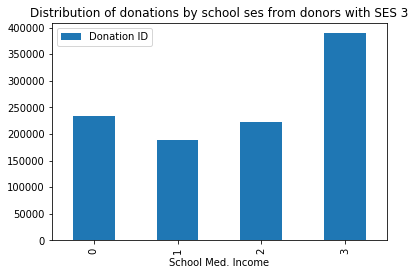

In [0]:
don_ses3=ses_donations[ses_donations['Donor Med. Income']=='3']
don3_combos=don_ses3.groupby('School Med. Income', as_index=False)['Donation ID'].count()
don3_combos=don3_combos.set_index('School Med. Income')
don3_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 3')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 2')

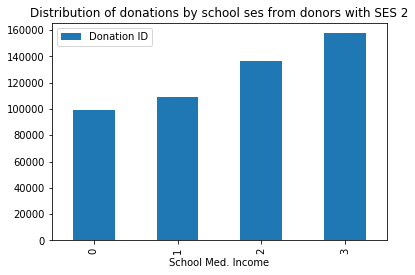

In [0]:
don_ses2=ses_donations[ses_donations['Donor Med. Income']=='2']
don2_combos=don_ses2.groupby('School Med. Income', as_index=False)['Donation ID'].count()
don2_combos=don2_combos.set_index('School Med. Income')
don2_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 2')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 1')

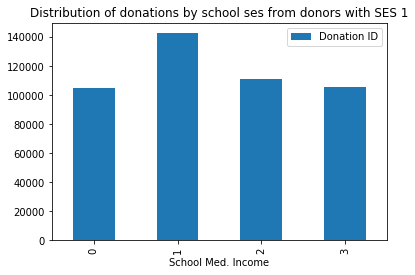

In [0]:
don_ses1=ses_donations[ses_donations['Donor Med. Income']=='1']
don1_combos=don_ses1.groupby('School Med. Income', as_index=False)['Donation ID'].count()
don1_combos=don1_combos.set_index('School Med. Income')
don1_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 1')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 0')

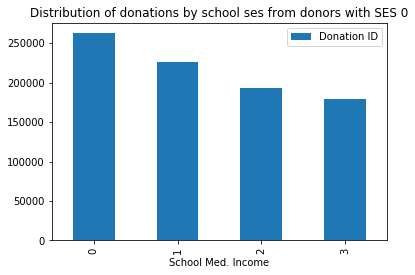

In [0]:
don_ses0=ses_donations[ses_donations['Donor Med. Income']=='0']
don0_combos=don_ses0.groupby('School Med. Income', as_index=False)['Donation ID'].count()
don0_combos=don0_combos.set_index('School Med. Income')
don0_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 0')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 3')

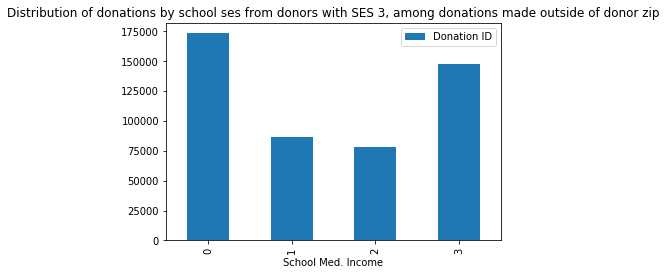

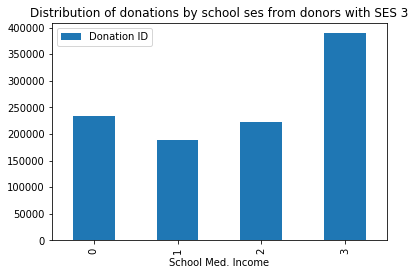

In [0]:
#next thing to do: make dataframe with only donations that were not distance 0
#check those for donor-school ses pairings
#i.e., "if you choose to donate outside of your zip code, what school ses are you more likely to donate to based on your own ses"
not_same=ses_donations[ses_donations['Donor Zip']!=ses_donations['School Zip']]
not_don_ses3=not_same[not_same['Donor Med. Income']=='3']
not_don3_combos=not_don_ses3.groupby('School Med. Income', as_index=False)['Donation ID'].count()
not_don3_combos=not_don3_combos.set_index('School Med. Income')
not_don3_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 3, among donations made outside of donor zip')
don3_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 3')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 2')

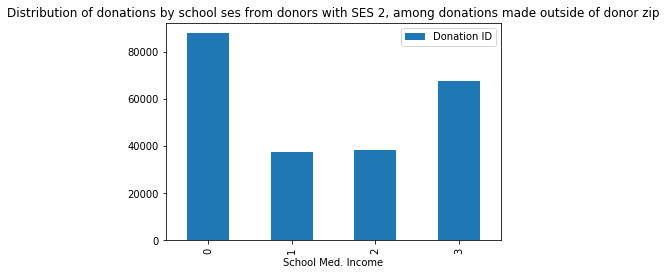

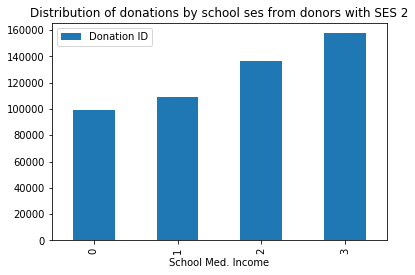

In [0]:
not_don_ses2=not_same[not_same['Donor Med. Income']=='2']
not_don2_combos=not_don_ses2.groupby('School Med. Income', as_index=False)['Donation ID'].count()
not_don2_combos=not_don2_combos.set_index('School Med. Income')
not_don2_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 2, among donations made outside of donor zip')
don2_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 2')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 1')

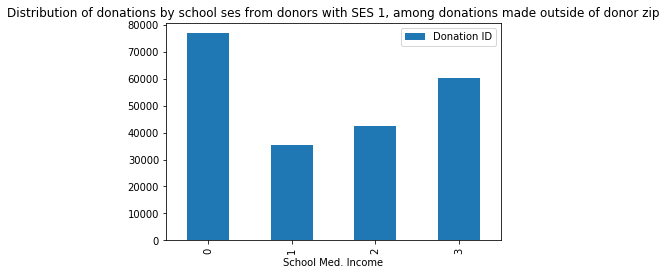

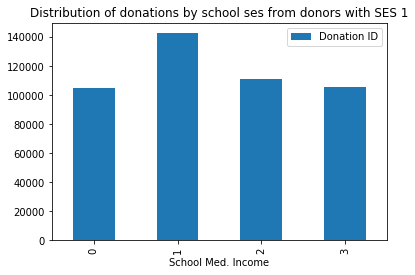

In [0]:
not_don_ses1=not_same[not_same['Donor Med. Income']=='1']
not_don1_combos=not_don_ses1.groupby('School Med. Income', as_index=False)['Donation ID'].count()
not_don1_combos=not_don1_combos.set_index('School Med. Income')
not_don1_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 1, among donations made outside of donor zip')
don1_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 1')

Text(0.5, 1.0, 'Distribution of donations by school ses from donors with SES 0')

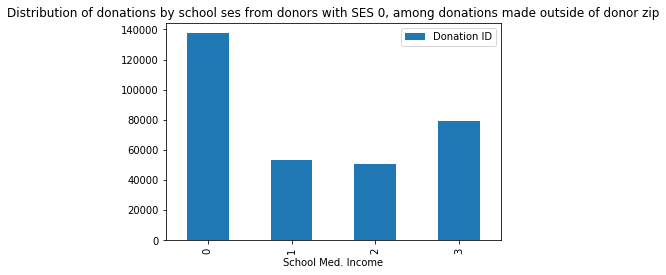

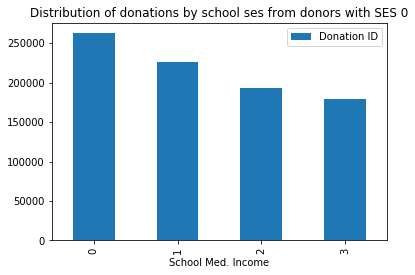

In [0]:
not_don_ses0=not_same[not_same['Donor Med. Income']=='0']
not_don0_combos=not_don_ses0.groupby('School Med. Income', as_index=False)['Donation ID'].count()
not_don0_combos=not_don0_combos.set_index('School Med. Income')
not_don0_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 0, among donations made outside of donor zip')
don0_combos.plot.bar().set_title('Distribution of donations by school ses from donors with SES 0')

Text(0.5, 1.0, 'Distribution of Donor Med. Income among Donors who Donate Within Their Zip Code')

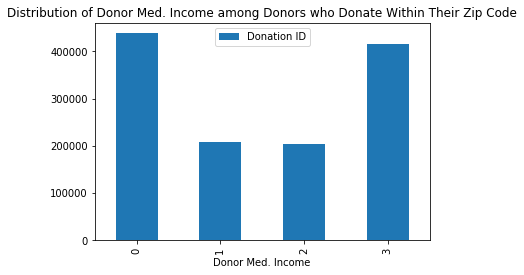

In [0]:
#make column for whether donation is to a school in the donor's zip code
ses_donations.loc[ses_donations['Donor Zip'] == ses_donations['School Zip'], 'Same Zip'] = '1'
ses_donations.loc[ses_donations['Donor Zip'] != ses_donations['School Zip'], 'Same Zip'] = '0'
same_zip=ses_donations[ses_donations['Same Zip']=='1']
diff_zip=ses_donations[ses_donations['Same Zip']=='0']
same_zip_ses=same_zip.groupby('Donor Med. Income', as_index=False)['Donation ID'].count()
same_zip_ses=same_zip_ses.set_index('Donor Med. Income')
same_zip_ses.plot.bar().set_title('Distribution of Donor Med. Income among Donors who Donate Within Their Zip Code')

Text(0.5, 1.0, 'Distribution of Donor Med. Income among Donors who Donate Outside Their Zip Code')

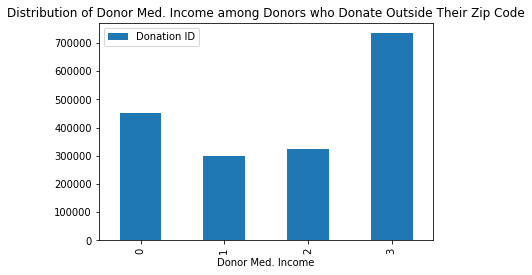

In [0]:
diff_zip_ses=diff_zip.groupby('Donor Med. Income', as_index=False)['Donation ID'].count()
diff_zip_ses=diff_zip_ses.set_index('Donor Med. Income')
diff_zip_ses.plot.bar().set_title('Distribution of Donor Med. Income among Donors who Donate Outside Their Zip Code')

In [0]:
! pip install geopandas
! pip install shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 10.1MB 35.0MB/s 
     |████████████████████████████████| 11.8MB 203kB/s 


In [0]:
usa = gpd.read_file('./maps/states_21basic/states.shp')
usa.plot()

DriverError: ignored

In [0]:
import urllib.request
import json

res = urllib.request.urlopen("http://api.postcodes.io/postcodes/SE18XX").read()
data = json.loads(res)
print(data["result"]["longitude"], data["result"]["latitude"])

-0.116825 51.505767


In [0]:
 import requests
newnew='https://www.zipcodeapi.com/rest/<api_key>/distance.<format>/<zip_code1>/<zip_code2>/<units>'
GOOGLE_MAPS_API_URL = 'http://maps.googleapis.com/maps/api/geocode/json'
newapi='https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/api/'

params = {'zip code 1': '02401',
          'zip code 2':'33156'}

# Do the request and get the response data
req = requests.get(newnew, params=params)
#res = req.json()

# Use the first result
#result = res['results']
req.json()
#print(result["result"]["longitude"], result["result"]["latitude"])

#geodata = dict()
#geodata['lat'] = result['geometry']['location']['lat']
#geodata['lng'] = result['geometry']['location']['lng']
#geodata['address'] = result['formatted_address']

#print('{address}. (lat, lng) = ({lat}, {lng})'.format(**geodata))

JSONDecodeError: ignored

In [0]:
! pip install uszipcode
! pip install --upgrade uszipcode

     |████████████████████████████████| 378kB 2.9MB/s 
     |████████████████████████████████| 204kB 51.4MB/s 
     |████████████████████████████████| 122kB 49.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for autopep8: filename=autopep8-1.4.4-py2.py3-none-any.whl size=42631 sha256=c937d76540a19de9ab804b9e02ce616190cce5d6b83faf58bf638c2ccd29cfd9
  Stored in directory: /root/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510
Successfully built autopep8
Requirement already up-to-date: uszipcode in /usr/local/lib/python3.6/dist-packages (0.2.4)


In [0]:
! pip install uszipcode
! pip install --upgrade uszipcode
from uszipcode import SearchEngine


     |████████████████████████████████| 378kB 2.7MB/s 
     |████████████████████████████████| 204kB 12.1MB/s 
     |████████████████████████████████| 122kB 13.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for autopep8: filename=autopep8-1.4.4-py2.py3-none-any.whl size=42631 sha256=9f959a1cb8d4d851dd00aafea5bc61de8870b38dbd40d78106a06d2f21ff16b9
  Stored in directory: /root/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510
Successfully built autopep8
Requirement already up-to-date: uszipcode in /usr/local/lib/python3.6/dist-packages (0.2.4)


In [0]:
! sudo apt-get install libgeos-3.5.0
! sudo apt-get install libgeos-dev
! sudo pip install https://github.com/matplotlib/basemap/archive/master.zip

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon



Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-drivers cuda-license-10-2 cuda-npp-10-1
  cuda-npp-dev-10-1 cuda-nsight-10-1 cuda-nsight-compute-10-1
  cuda-nsight-systems-10-1 cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1
  cuda-nvjpeg-10-1 cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1
  cuda-nvvp-10-1 default-jre dkms freeglut3 freeglut3-dev
  keyboard-configuration libargon2-0 libcap2 libcryptsetup12 libcublas10
  libdevmapper1.02.1 libfontenc1 l

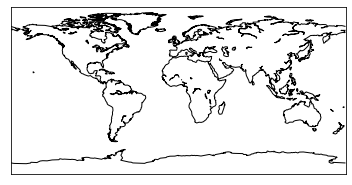

<Figure size 432x288 with 0 Axes>

In [0]:
map = Basemap()

map.drawcoastlines()

plt.show()
plt.savefig('test.png')


In [0]:
merged

,Donation ID,Donor Zip,School Zip
0,688729120858666221208529ee3fc18e,84001,84001
1,dcf1071da3aa3561f91ac689d1f73dee,84001,84001
2,18a234b9d1e538c431761d521ea7799d,84001,84001
3,38d2744bf9138b0b57ed581c76c0e2da,85001,84001
4,5a032791e31167a70206bfb86fb60035,84101,84001
...,...,...,...
4411919,f6d8ee2175b228aea5befeb6e4d3f9ae,43901,43701
4411920,fa9e4006445bfc0653e4be155c957e66,43701,43701
4411921,970d327c79afa548efb147f330c4a5a2,85001,63001
4411922,c66be02367f2ab9692c6e6825fe652a4,07801,71001


In [0]:
from numpy.random import randint
search = SearchEngine(simple_zipcode=True)
search.by_zipcode(merged.iloc[1,1])

SimpleZipcode(zipcode='84001', zipcode_type='Standard', major_city='Altamont', post_office_city='Altamont, UT', common_city_list=['Altamont'], county='Duchesne County', state='UT', lat=40.4, lng=-110.5, timezone='Mountain', radius_in_miles=7.0, area_code_list=['435'], population=725, population_density=32.0, land_area_in_sqmi=22.57, water_area_in_sqmi=0.04, housing_units=272, occupied_housing_units=238, median_home_value=164200, median_household_income=68571, bounds_west=-110.331931, bounds_east=-110.228819, bounds_north=40.403103, bounds_south=40.289275)

In [0]:
# set simple_zipcode=False to use rich info database
#mapping trial HEART
d_counts = []
s_counts=[]
#make lists of latitudes and longitudes
for i in randint(0, 3400000, 1000):
  d_zipcode = search.by_zipcode(merged.iloc[i,1])
  d_zipcode=d_zipcode.to_dict()
  d_counts.append(d_zipcode['county'])
  s_zipcode = search.by_zipcode(merged.iloc[i,2])
  s_zipcode=s_zipcode.to_dict()
  s_counts.append(s_zipcode['county'])
inds=[]

#drop school-donor pairs if either one has a "Nan" value
for i in np.arange(1000):
  if d_counts[i]==None:
    inds.append(i)
  if s_counts[i]==None:
    inds.append(i)
inds = list(set(inds))
inds.sort(reverse=True)
for i in inds:
    del d_counts[i]
    del s_counts[i]

In [0]:
same_d_counts=[]
same_s_counts=[]
diff_d_counts=[]
diff_s_counts=[]
same_counts=pd.DataFrame()
diff_counts=pd.DataFrame()
#differentiate between donors and projects in same/different cities
for i in np.arange(len(d_counts)):
  if d_counts[i]==s_counts[i]:
    same_d_counts.append(d_counts[i])
    same_s_counts.append(s_counts[i])
  else:
    diff_d_counts.append(d_counts[i])
    diff_s_counts.append(s_counts[i])
same_counts['DonorCounties']=same_d_counts
same_counts['SchoolCounties']=same_s_counts
diff_counts['DonorCounties']=diff_d_counts
diff_counts['SchoolCounties']=diff_s_counts

In [0]:
diff_counts[0]

,DonorCounties,SchoolCounties
0,Greenville County,Alameda County
1,Harford County,Baltimore city
2,Hartford County,Nassau County
3,New York County,Kings County
4,Harnett County,Durham County
...,...,...
417,Monmouth County,Harris County
418,Fulton County,Grand Forks County
419,Jefferson County,District of Columbia
420,Alamance County,Guilford County


In [0]:
from collections import Counter

In [0]:
d_data=diff_counts.iloc[:,0]

In [0]:
s_data=same_counts.iloc[:,0]
sorted_s = sorted(Counter(s_data).items(), key=lambda x: x[0], reverse=True)
sdata=[sorted_s[i][1] for i in np.arange(len(sorted_s))]
scts=[sorted_s[i][0] for i in np.arange(len(sorted_s))]
scts2=[scts[i].replace(" County","") for i in np.arange(len(scts))]

In [0]:
data3=[]
for i in np.arange(len(data)):
  if (cts3[i] in scts2)==True:
    j=scts2.index(cts3[i])
    tot=data[i]+data[j]
    data3.append(data[i]/tot)
  else:
    continue
data3

In [0]:
"York" in scts2

False

In [0]:
scts2

In [0]:
Counter(d_data).keys() # equals to list(set(words))
Counter(d_data).values() # counts the elements' frequency

dict_values([2, 2, 6, 10, 1, 1, 3, 2, 4, 3, 26, 10, 1, 1, 2, 3, 5, 2, 1, 1, 2, 2, 1, 6, 3, 1, 4, 4, 5, 2, 1, 1, 7, 5, 1, 2, 10, 2, 2, 2, 2, 6, 1, 6, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 1, 2, 1, 3, 2, 7, 1, 2, 1, 1, 1, 7, 2, 3, 1, 8, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 12, 2, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 3, 2, 4, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [0]:
d_data

0      Greenville County
1         Harford County
2        Hartford County
3        New York County
4         Harnett County
             ...        
417      Monmouth County
418        Fulton County
419     Jefferson County
420      Alamance County
421        Camden County
Name: DonorCounties, Length: 422, dtype: object

In [0]:
import operator
sorted_x = sorted(Counter(d_data).items(), key=lambda x: x[0], reverse=True)
data=[sorted_x[i][1] for i in np.arange(len(sorted_x))]
cts=[sorted_x[i][0] for i in np.arange(len(sorted_x))]

In [0]:
cts2=[cts[i].replace(" County","") for i in np.arange(len(cts))]

In [0]:
#creating the heat map
sf=us
def calc_color(data, color=None):
        if color   == 1:color_sq =['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors = 'YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else: color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 4, retbins=True, duplicates="drop", 
        labels=list(range(4)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(4):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4")    
        return color_ton, bins;
#plotting the data
def plot_data(sf, title, comunas, data=None, color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = comuna_id.append(df[df.NAME == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (20,15));
#fill the map                                     
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (20,15)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
          x = [i[0] for i in shape.shape.points[:]]
          y = [i[1] for i in shape.shape.points[:]]
          ax.plot(x, y, 'k')           
    for id in comuna:
      shape_ex = sf.shape(id)
      x_lon = np.zeros((len(shape_ex.points),1))
      y_lat = np.zeros((len(shape_ex.points),1))
      for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
      if print_id != False:
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
      if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


In [0]:
len(us.shapeRecords())

3141

In [0]:
usa

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,coords
0,Lake of the Woods,Minnesota,27,077,27077,"[(-95.34283127277658, 48.546679319076), (-95.3..."
1,Ferry,Washington,53,019,53019,"[(-118.85162880133869, 47.949563684819964), (-..."
2,Stevens,Washington,53,065,53065,"[(-117.43883157628596, 48.04411548512263), (-1..."
3,Okanogan,Washington,53,047,53047,"[(-118.97209386283504, 47.93915200536639), (-1..."
4,Pend Oreille,Washington,53,051,53051,"[(-117.43858043030278, 48.99991850672649), (-1..."
...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,02,232,02232,"[(-137.80952119201925, 58.716481360991196), (-..."
3137,Yukon-Koyukuk,Alaska,02,290,02290,"[(-161.04770218918281, 62.20469454497495), (-1..."
3138,Southeast Fairbanks,Alaska,02,240,02240,"[(-146.96381942414519, 63.46070394365374), (-1..."
3139,Denali,Alaska,02,068,02068,"[(-152.9894742378389, 62.74899735973684), (-15..."


In [0]:
for id in cts3:
  shape_ex = us.shape(id)
  x_lon = np.zeros((len(shape_ex.points),1))
  y_lat = np.zeros((len(shape_ex.points),1))

TypeError: ignored

In [0]:
data3=[data[i]/len(data) for i in np.arange(len(data))]

In [0]:
new_data, bins = pd.qcut(data3, 4, retbins=True, 
        labels=list(range(4)))

In [0]:
x_lon

NameError: ignored


1: 0 => -1 
2: 0 => -1 
3: 0 => -1 
4: 0 => -1 

   1   2   3   4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



IndexError: ignored

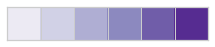

<Figure size 1440x1080 with 0 Axes>

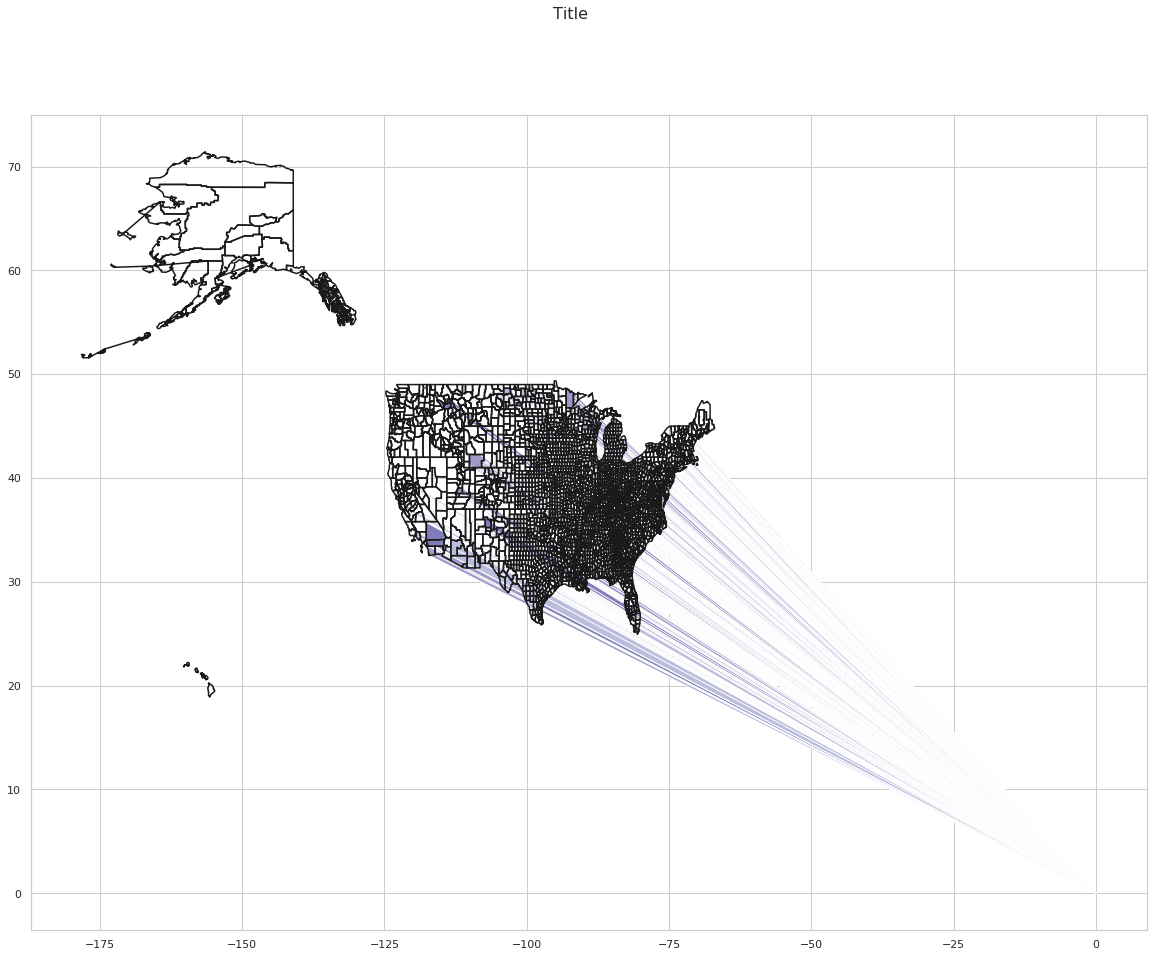

In [0]:
print_id = False # The shape id will not be printed
color_pallete = 1 # 'Purples'

plot_data(us, 'Title', cts3, data3, color_pallete, print_id)

In [0]:
df = read_shapefile(us)
comuna_id = []
for i in cts2[:30]:
  i = comuna_id.append(df[df.NAME == i].index.get_values()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



IndexError: ignored

In [0]:
import folium
from folium import plugins
from io import StringIO
import folium 


statesll=StringIO("""State,Latitude,Longitude
Alabama,32.806671,-86.791130
Alaska,61.370716,-152.404419
Arizona,33.729759,-111.431221
Arkansas,34.969704,-92.373123
California,36.116203,-119.681564
Colorado,39.059811,-105.311104
Connecticut,41.597782,-72.755371
Delaware,39.318523,-75.507141
District of Columbia,38.897438,-77.026817
Florida,27.766279,-81.686783
Georgia,33.040619,-83.643074
Hawaii,21.094318,-157.498337
Idaho,44.240459,-114.478828
Illinois,40.349457,-88.986137
Indiana,39.849426,-86.258278
Iowa,42.011539,-93.210526
Kansas,38.526600,-96.726486
Kentucky,37.668140,-84.670067
Louisiana,31.169546,-91.867805
Maine,44.693947,-69.381927
Maryland,39.063946,-76.802101
Massachusetts,42.230171,-71.530106
Michigan,43.326618,-84.536095
Minnesota,45.694454,-93.900192
Mississippi,32.741646,-89.678696
Missouri,38.456085,-92.288368
Montana,46.921925,-110.454353
Nebraska,41.125370,-98.268082
Nevada,38.313515,-117.055374
New Hampshire,43.452492,-71.563896
New Jersey,40.298904,-74.521011
New Mexico,34.840515,-106.248482
New York,42.165726,-74.948051
North Carolina,35.630066,-79.806419
North Dakota,47.528912,-99.784012
Ohio,40.388783,-82.764915
Oklahoma,35.565342,-96.928917
Oregon,44.572021,-122.070938
Pennsylvania,40.590752,-77.209755
Rhode Island,41.680893,-71.511780
South Carolina,33.856892,-80.945007
South Dakota,44.299782,-99.438828
Tennessee,35.747845,-86.692345
Texas,31.054487,-97.563461
Utah,40.150032,-111.862434
Vermont,44.045876,-72.710686
Virginia,37.769337,-78.169968
Washington,47.400902,-121.490494
West Virginia,38.491226,-80.954453
Wisconsin,44.268543,-89.616508
Wyoming,42.755966,-107.302490""")

tempdf = states_df = donors_df['Donor State'].value_counts()
t1 = pd.DataFrame()
t1['Donor State'] = tempdf.index
t1['Donor Count'] = tempdf.values

# tempdf = combined_df.groupby(['Donor State']).agg({'Donation Amount':'sum'}).reset_index()
# t1 = tempdf.sort_values('Donation Amount', ascending=False)

sdf = pd.read_csv(statesll).rename(columns={'State':'Donor State'})
sdf = sdf.merge(t1, on='Donor State', how='inner')
sdf 

map4 = folium.Map(location=[39.50, -98.35], tiles='CartoDB dark_matter', zoom_start=3.5)
for j, rown in sdf.iterrows():
    rown = list(rown)
    folium.CircleMarker([float(rown[1]), float(rown[2])], popup="<b>State:</b>" + rown[0].title() +"<br> <b>Donors:</b> "+str(int(rown[3])), radius=float(rown[3])*0.0001, color='#be0eef', fill=True).add_to(map4)
map4

In [0]:
id in data3

False

In [0]:
cts3=cts2
data2=data
indss = list(set(indss))
indss.sort(reverse=True)
for i in indss:
    del cts3[i]
    del data[i]

In [0]:
indss=[]
for i in cts2:
  if df[df.NAME==i].empty:
    indss.append(cts2.index(i))

In [0]:
indss

[25, 91, 102, 112, 178, 183, 184, 187]

In [0]:
cts2

['Camden',
 'Alamance',
 'Jefferson',
 'Fulton',
 'Monmouth',
 'Gloucester',
 'Providence',
 'Greene',
 'Fulton',
 'Guilford',
 'Milwaukee',
 'Madison',
 'Providence',
 'Sevier',
 'Montgomery',
 'Pima',
 'Ventura',
 'Madison',
 'McHenry',
 'Licking',
 'Greenville',
 'Pima',
 'Riverside',
 'Hunterdon',
 'La Salle',
 'Harford',
 'Santa Clara',
 'San Diego',
 'Sonoma',
 'Bienville Parish',
 'Catawba',
 'Dutchess',
 'Lafayette',
 'Sweetwater',
 'Nueces',
 'York',
 'Gratiot',
 'Middlesex',
 'McHenry',
 'New Haven',
 'Rockland',
 'Middlesex',
 'Beaver',
 'King',
 'Middlesex',
 'Buncombe',
 'Escambia',
 'Seminole',
 'Contra Costa',
 'Marin',
 'Bannock',
 'Cook',
 'Summit',
 'Lancaster',
 'Alamance',
 'Lee',
 'Pierce',
 'Craighead',
 'Maricopa',
 'Lee',
 'Gratiot',
 'Maricopa',
 'Chester',
 'Minnehaha',
 'New York',
 'Indiana',
 'Seminole',
 'Multnomah',
 'Cook',
 'Powhatan',
 'Cecil',
 'Accomack',
 'Sevier',
 'Westchester',
 'Howard',
 'Loudoun',
 'Los Angeles',
 'Mahoning',
 'Clark',
 'Duval

In [0]:
df[df.NAME == "Bienville Parish"].index.get_values()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



array([], dtype=int64)

In [0]:
cts2=[cts[i].replace(' County','') for i in np.arange(len(cts))]
cts2

['Camden',
 'Alamance',
 'Jefferson',
 'Fulton',
 'Monmouth',
 'Gloucester',
 'Providence',
 'Greene',
 'Fulton',
 'Guilford',
 'Milwaukee',
 'Madison',
 'Providence',
 'Sevier',
 'Montgomery',
 'Pima',
 'Ventura',
 'Madison',
 'McHenry',
 'Licking',
 'Lynchburg city',
 'Greenville',
 'Pima',
 'Riverside',
 'Hunterdon',
 'La Salle',
 'Harford',
 'Santa Clara',
 'San Diego',
 'Sonoma',
 'Bienville Parish',
 'Catawba',
 'Dutchess',
 'Lafayette',
 'Sweetwater',
 'Nueces',
 'York',
 'Gratiot',
 'Middlesex',
 'McHenry',
 'New Haven',
 'Rockland',
 'Middlesex',
 'Beaver',
 'King',
 'Middlesex',
 'Buncombe',
 'Escambia',
 'Seminole',
 'Contra Costa',
 'Marin',
 'Bannock',
 'Cook',
 'Summit',
 'Lancaster',
 'Alamance',
 'Lee',
 'Pierce',
 'Craighead',
 'Maricopa',
 'Lee',
 'Gratiot',
 'Maricopa',
 'Chester',
 'Minnehaha',
 'New York',
 'Indiana',
 'Seminole',
 'Multnomah',
 'Cook',
 'Powhatan',
 'Cecil',
 'Accomack',
 'Sevier',
 'Westchester',
 'Howard',
 'Loudoun',
 'Los Angeles',
 'Mahoning'

In [0]:
df[df.NAME=="Cook"]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,coords
2701,Cook,Georgia,13,075,13075,"[(-83.46749675549688, 31.02502123336093), (-83..."
2924,Cook,Minnesota,27,031,27031,"[(-91.02714843701884, 48.19533893601286), (-90..."
3080,Cook,Illinois,17,031,17031,"[(-88.26711308670222, 41.988789130782386), (-8..."


In [0]:
 # set simple_zipcode=False to use rich info database
#mapping trial
d_lats = []
d_lons=[]
s_lats=[]
s_lons=[]
#make lists of latitudes and longitudes
for i in randint(0, 3400000, 1000):
  d_zipcode = search.by_zipcode(merged.iloc[i,1])
  d_zipcode=d_zipcode.to_dict()
  d_lats.append(d_zipcode['lat'])
  d_lons.append(d_zipcode['lng'])
  s_zipcode = search.by_zipcode(merged.iloc[i,2])
  s_zipcode=s_zipcode.to_dict()
  s_lats.append(s_zipcode['lat'])
  s_lons.append(s_zipcode['lng'])
inds=[]

#drop school-donor pairs if either one has a "Nan" value
for i in np.arange(1000):
  if d_lats[i]==None:
    inds.append(i)
  if s_lats[i]==None:
    inds.append(i)
  if d_lons[i]==None:
    inds.append(i)
  if s_lons[i]==None:
    inds.append(i)
inds = list(set(inds))
inds.sort(reverse=True)
for i in inds:
    del d_lats[i]
    del d_lons[i]
    del s_lats[i]
    del s_lons[i]

In [0]:
s_lats

In [0]:
same_d_lat=[]
same_d_lon=[]
same_s_lat=[]
same_s_lon=[]
diff_d_lat=[]
diff_d_lon=[]
diff_s_lat=[]
diff_s_lon=[]
same_zips=pd.DataFrame()
diff_zips=pd.DataFrame()
#differentiate between donors and projects in same/different cities
for i in np.arange(len(d_lats)):
  if (d_lats[i],d_lons[i])==(s_lats[i],s_lons[i]):
    same_d_lat.append(d_lats[i])
    same_d_lon.append(d_lons[i])
    same_s_lat.append(s_lats[i])
    same_s_lon.append(s_lons[i])
  else:
    diff_d_lat.append(d_lats[i])
    diff_d_lon.append(d_lons[i])
    diff_s_lat.append(s_lats[i])
    diff_s_lon.append(s_lons[i])
same_zips['DonorLat']=same_d_lat
same_zips['DonorLon']=same_d_lon
same_zips['SchoolLat']=same_s_lat
same_zips['SchoolLon']=same_s_lon
diff_zips['DonorLat']=diff_d_lat
diff_zips['DonorLon']=diff_d_lon
diff_zips['SchoolLat']=diff_s_lat
diff_zips['SchoolLon']=diff_s_lon

In [0]:
diff_zips

,Donor Lat,Donor Lon,School Lat,School Lon
0,42.050,-87.680,41.88,-87.62
1,34.950,-81.990,34.30,-119.30
2,38.421,-120.827,47.66,-117.44
3,41.380,-73.390,40.20,-100.60
4,33.850,-117.960,42.35,-83.06
...,...,...,...,...
331,29.480,-98.530,27.78,-82.62
332,41.380,-73.390,41.34,-87.62
333,34.170,-118.370,39.10,-93.50
334,40.890,-74.050,44.99,-93.27


In [0]:
lon1, lat1 = m(diff_zips.DonorLon.values, diff_zips.DonorLat.values)
lon2, lat2 = m(diff_zips.SchoolLon.values, diff_zips.SchoolLat.values)
# determine range to print based on min, max lat and long of the data
margin = .2 # buffer to add to the range
lat_min = min(min(diff_zips.DonorLat.values),min(diff_zips.SchoolLat.values)) - margin
lat_max = max(max(diff_zips.DonorLat.values),max(diff_zips.SchoolLat.values)) + margin
long_min = min(min(diff_zips.DonorLon.values),min(diff_zips.SchoolLon.values)) - margin
long_max = max(max(diff_zips.DonorLon.values),max(diff_zips.SchoolLon.values)) + margin
lat_0=(lat_max - lat_min)/2
lat_0

20.15

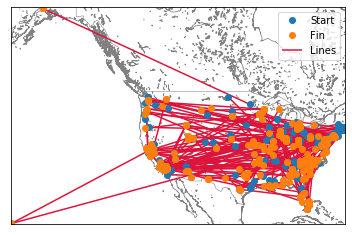

In [0]:
from matplotlib.collections import LineCollection
#m = Basemap(llcrnrlon=-12,llcrnrlat=30,urcrnrlon=50,urcrnrlat=69.,
             #resolution='i', projection='tmerc', lat_0 = 48.9, lon_0 = 15.3)
from bokeh.plotting import figure, show
from bokeh.sampledata.us_states import data as states
from bokeh.models import ColumnDataSource, Range1d

lon1, lat1 = m(diff_zips.DonorLon.values, diff_zips.DonorLat.values)
lon2, lat2 = m(diff_zips.SchoolLon.values, diff_zips.SchoolLat.values)
# determine range to print based on min, max lat and long of the data
margin = .2 # buffer to add to the range
lat_min = min(min(diff_zips.DonorLat.values),min(diff_zips.SchoolLat.values)) - margin
lat_max = max(max(diff_zips.DonorLat.values),max(diff_zips.SchoolLat.values)) + margin
long_min = min(min(diff_zips.DonorLon.values),min(diff_zips.SchoolLon.values)) - margin
long_max = max(max(diff_zips.DonorLon.values),max(diff_zips.SchoolLon.values)) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=long_min,
            llcrnrlat=lat_min,
            urcrnrlon=long_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(long_max-long_min)/2,
            projection='merc',
            resolution = 'h',
            )
m.drawcoastlines(linewidth=0.72, color='gray')
m.drawcountries(zorder=0, color='gray')


#pts = np.c_[diff_zips.DonorLon.values, diff_zips.DonorLat.values, diff_zips.SchoolLon.values, diff_zips.SchoolLat.values].reshape(len(lon1), 2, 2)
pts = np.c_[lon1, lat1, lon2, lat2].reshape(len(lon1), 2, 2)
plt.gca().add_collection(LineCollection(pts, color="crimson", label="Lines"))
m.plot(lon1, lat1, marker="o", ls="", label="Donor")
m.plot(lon2, lat2, marker="o", ls="", label="School")

plt.legend()
plt.show()

In [0]:
! pip install pyshp
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32607 sha256=dc60ab22e19f8c739f11c5becf4e3a741684a5e4c2b56a4477e29af761ea2ed5
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [0]:
! pip install geopandas
import geopandas as gpd
#shapefile = 'data/countries_110m/ne_110m_admin_0_countries.shp'

#Read shapefile using Geopandas
#gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
#gdf.columns = ['country', 'country_code', 'geometry']
#gdf.head()

In [0]:
country = gpd.read_file("data/gz_2010_us_040_00_5m.json")

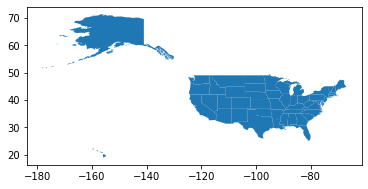

In [0]:
usa.plot()

In [0]:
usa.records()

In [0]:
us=shp.Reader('UScounties.shp')
usa = shp.Reader('states.shp')
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [0]:
us2 = shp.Reader('citiesx020.shp')

In [0]:
us2df=read_shapefile(us2)

In [0]:
us2df

In [0]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

In [0]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [0]:
#creating the heat map
sf=us
def calc_color(data, color=None):
        if color   == 1:color_sq =['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors = 'YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else: color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
#plotting the data
def plot_data(sf, title, comunas, data=None, color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = conv_comuna(i).upper()
        comuna_id.append(df[df.NOM_COMUNA == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
#fill the map                                     
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
          x = [i[0] for i in shape.shape.points[:]]
          y = [i[1] for i in shape.shape.points[:]]
          ax.plot(x, y, 'k')           
          for id in comuna:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
            if (x_lim != None) & (y_lim != None):     
              plt.xlim(x_lim)
              plt.ylim(y_lim)


In [0]:
us.records()

In [0]:
usa=read_shapefile(us)

In [0]:
usa

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,coords
0,Lake of the Woods,Minnesota,27,077,27077,"[(-95.34283127277658, 48.546679319076), (-95.3..."
1,Ferry,Washington,53,019,53019,"[(-118.85162880133869, 47.949563684819964), (-..."
2,Stevens,Washington,53,065,53065,"[(-117.43883157628596, 48.04411548512263), (-1..."
3,Okanogan,Washington,53,047,53047,"[(-118.97209386283504, 47.93915200536639), (-1..."
4,Pend Oreille,Washington,53,051,53051,"[(-117.43858043030278, 48.99991850672649), (-1..."
...,...,...,...,...,...,...
3136,Skagway-Hoonah-Angoon,Alaska,02,232,02232,"[(-137.80952119201925, 58.716481360991196), (-..."
3137,Yukon-Koyukuk,Alaska,02,290,02290,"[(-161.04770218918281, 62.20469454497495), (-1..."
3138,Southeast Fairbanks,Alaska,02,240,02240,"[(-146.96381942414519, 63.46070394365374), (-1..."
3139,Denali,Alaska,02,068,02068,"[(-152.9894742378389, 62.74899735973684), (-15..."


In [0]:
usa['STATE_NAME'].unique()

array(['Minnesota', 'Washington', 'Idaho', 'Montana', 'North Dakota',
       'Maine', 'Wisconsin', 'Oregon', 'South Dakota', 'New Hampshire',
       'Vermont', 'New York', 'Wyoming', 'Iowa', 'Nebraska',
       'Massachusetts', 'Illinois', 'Connecticut', 'Rhode Island', 'Utah',
       'California', 'Pennsylvania', 'Nevada', 'Ohio', 'Indiana',
       'New Jersey', 'Colorado', 'West Virginia', 'Missouri', 'Kansas',
       'Delaware', 'Maryland', 'Virginia', 'Kentucky',
       'District of Columbia', 'Arizona', 'Oklahoma', 'New Mexico',
       'Tennessee', 'North Carolina', 'Texas', 'Arkansas',
       'South Carolina', 'Alabama', 'Mississippi', 'Georgia', 'Louisiana',
       'Florida', 'Michigan', 'Alaska', 'Hawaii'], dtype=object)

In [0]:
states=
data = [100, 2000, 300, 400000, 500, 600, 100, 2000, 300, 400, 500, 600, 100, 2000, 300, 400, 500, 600]
print_id = False # The shape id will not be printed
color_pallete = 1 # 'Purples'
plot_data(us, 'Title', south, data, color_pallete, print_id)

In [0]:
plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9))

In [0]:
import plotly.express as px

gapminder = px.data.gapminder().query("year==2007")
fig = px.choropleth(gapminder, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [0]:
! pip install geoplot
import geoplot
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world.query('continent == "United States of America"')
ax = geoplot.cartogram(
    usa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(usa, edgecolor='gray', ax=ax)
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
usa

     |████████████████████████████████| 8.9MB 6.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmp2jho3j_d Check the logs for full command output.


ModuleNotFoundError: ignored

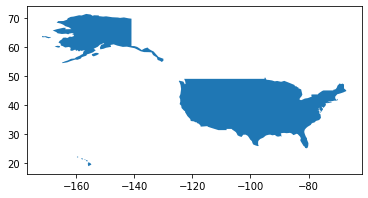

In [0]:
world=world[world['name']=='United States of America']
world.plot()

In [0]:
simport json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)



from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

ValueError: ignored

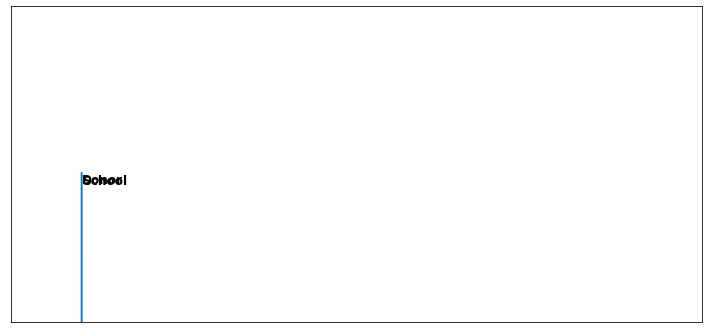

In [0]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 8) )
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
d_lat=[]
d_lon=[]
s_lat=[]
s_lon=[]
for i in np.arange(len(diff_zips)):
  d_lat.append(diff_zips.iloc[i,0][0])
  d_lon.append(diff_zips.iloc[i,0][1])
  s_lat.append(diff_zips.iloc[i,1][0])
  s_lon.append(diff_zips.iloc[i,1][1])
# nylat, nylon are lat/lon of New York
##nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
##lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
for i in np.arange(50):
  m.drawgreatcircle(d_lon[i],d_lat[i],s_lon[i],s_lon[i],linewidth=2)
  x, y = m(s_lon[i], s_lat[i])  
  plt.text(x, y, 'School',fontsize=12,fontweight='bold', ha='left',va='top',color='k')

  x, y = m(d_lon[i], d_lat[i])   
  plt.text(x, y, 'Donor',fontsize=12,fontweight='bold',ha='left',va='top',color='k')
##m.fillcontinents(color='tan',lake_color='lightblue')
##m.drawmapboundary(fill_color='lightblue')


# When you use regular matplotlib commands, you need to get the mapping from the
# map projection to x,y that matplotlib uses. This is accomplished using the Basemap object,
# here which is assigned to be m()


ax.set_title('Ah');

In [0]:
search = SearchEngine(simple_zipcode=True) # set simple_zipcode=False to use rich info database
zipcode = search.by_zipcode("02301")
zipcode=zipcode.to_dict()
zipcode

{'area_code_list': ['508', '774', '781'],
 'bounds_east': -70.996674,
 'bounds_north': 42.117293,
 'bounds_south': 42.042178,
 'bounds_west': -71.080483,
 'common_city_list': ['Brockton'],
 'county': 'Plymouth County',
 'housing_units': 23673,
 'land_area_in_sqmi': 12.43,
 'lat': 42.08,
 'lng': -71.04,
 'major_city': 'Brockton',
 'median_home_value': 238500,
 'median_household_income': 44144,
 'occupied_housing_units': 22044,
 'population': 61025,
 'population_density': 4908.0,
 'post_office_city': 'Brockton, MA',
 'radius_in_miles': 4.0,
 'state': 'MA',
 'timezone': 'Eastern',
 'water_area_in_sqmi': 0.17,
 'zipcode': '02301',
 'zipcode_type': 'Standard'}

In [0]:
import numpy as np
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 8) )
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-100.,llcrnrlat=20.,urcrnrlon=20.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
# nylat, nylon are lat/lon of New York
nylat = 40.78; nylon = -73.98
# lonlat, lonlon are lat/lon of London.
lonlat = 51.53; lonlon = 0.08
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b')
m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
m.drawmapboundary(fill_color='lightblue')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])


# When you use regular matplotlib commands, you need to get the mapping from the
# map projection to x,y that matplotlib uses. This is accomplished using the Basemap object,
# here which is assigned to be m()
x, y = m(lonlon, lonlat)  
plt.text(x, y, 'London',fontsize=12,fontweight='bold', ha='left',va='top',color='k')

x, y = m(nylon, nylat)  
plt.text(x, y, 'New York',fontsize=12,fontweight='bold',ha='left',va='top',color='k')

ax.set_title('Great Circle from New York to London');

In [0]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r